# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Muhammad Alfan Fauzi
- **Email:** alfanfauzi@student.ub.ac.id
- **ID Dicoding:** MC006D5Y1331

## Menentukan Pertanyaan Bisnis

- Perlihatkan jumlah penyewa setiap bulan
- Perbandingkan jumlah casual dan registered pada setiap tahun

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- data diatas adalah data penyewaan sepeda selama 2 tahun yang memiliki 731 data dan 16 kolom

### Assessing Data

In [9]:
# cek type data dan jumlah pada setiap kolom
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [11]:
#cek apakah terdapat data yang hilang
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [12]:
#cek apakah ada data yang duplikat
day_df.duplicated().sum()

0

In [13]:
#melihat data count,mean,std,min dll pada setiap kolom
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


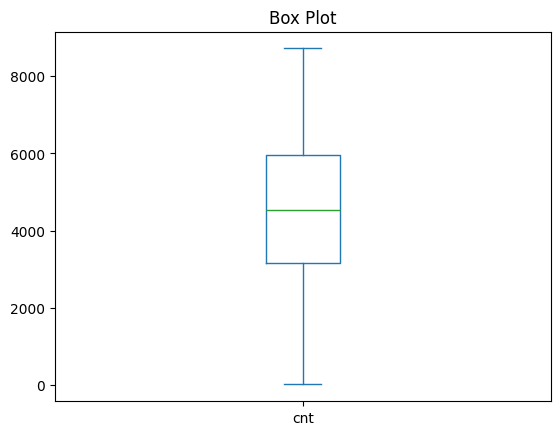

In [14]:
#cek apakah terdapat outlier pada kolom cnt
day_df['cnt'].plot(kind='box')
plt.title('Box Plot')
plt.show()

**Insight:**
- pada data diatas memiliki data yang bersih tidak ada data yang hilang, data yang diplikat, tidak ada outlier pada data. tetapi terdapat keanehan pada type data kolom dydate

### Cleaning Data

In [15]:
# mengubah type data kolom dteday menjadi format tanggal
datetime_column = 'dteday'
day_df[datetime_column] = pd.to_datetime(day_df[datetime_column])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- pada Assessing data terlihat keanehan pada kolom dteday yang memiliki type data object seharusnya pada dteday yang berisikan data tanggal memiliki type data datetime

## Exploratory Data Analysis (EDA)

### Explore ...

In [24]:
#cek jumlah penyewa, maksimal penyewa, minimal penyewa pada setiap season
day_df.groupby(['season']).agg({
    'cnt': ['sum','max','min']})

cnt            
            sum   max   min
season                     
1        471348  7836   431
2        918589  8362   795
3       1061129  8714  1115
4        841613  8555    22

In [26]:
#cek jumlah penyewa, maksimal penyewa, minimal penyewa pada setiap weathersit

day_df.groupby(['weathersit']).agg({
    'cnt': ['sum','max','min']})

cnt           
                sum   max  min
weathersit                    
1           2257952  8714  431
2            996858  8362  605
3             37869  4639   22

In [27]:
#cek jumlah penyewa, maksimal penyewa, minimal penyewa pada kolom casual dan registered setiap weathersit

day_df.groupby(['season']).agg({
    'casual': ['sum','max','min'],
    'registered': ['sum','max','min']})

casual            registered           
           sum   max  min        sum   max  min
season                                         
1        60622  3155    9     410726  5315  416
2       203522  3410  120     715067  6456  674
3       226091  3160  118     835038  6917  889
4       129782  3031    2     711831  6946   20

In [29]:
#cek jumlah penyewa, maksimal penyewa, minimal penyewa pada kolom casual dan registered setiap weathersit

day_df.groupby(['yr']).agg({
    'casual': ['sum','max','min'],
    'registered': ['sum','max','min']})

casual           registered           
       sum   max min        sum   max  min
yr                                        
0   247252  3065   9     995851  4614  416
1   372765  3410   2    1676811  6946   20

In [40]:
#cek jumlah penyewa, maksimal penyewa, minimal penyewa per bulan 2011

data_2011 = day_df[day_df['yr'] == 0]

data_2011.groupby('mnth').agg({
    'cnt': ['sum', 'max', 'min']
}).sort_values(by=('cnt', 'sum'), ascending=False)


cnt            
         sum   max   min
mnth                    
6     143512  5515  3767
7     141341  6043  3285
8     136691  5895  1115
5     135821  5805  2633
9     127418  5423  1842
10    123511  5511   627
11    102167  4486  1495
4      94870  5312   795
12     87323  3940   705
3      64045  3239   605
2      48215  2927  1005
1      38189  1985   431

In [41]:
#cek jumlah penyewa, maksimal penyewa, minimal penyewa per bulan 2012

data_2011 = day_df[day_df['yr'] == 1]

data_2011.groupby('mnth').agg({
    'cnt': ['sum', 'max', 'min']
}).sort_values(by=('cnt', 'sum'), ascending=False)


cnt            
         sum   max   min
mnth                    
9     218573  8714  4073
8     214503  7865  4549
7     203607  8173  4459
6     202830  8120  4127
10    198841  8156    22
5     195865  8294  2843
4     174224  7460  1027
3     164875  8362  3194
11    152664  6852  2277
12    123713  6606   441
2     103137  5062  1529
1      96744  4521  1301

In [60]:
day_df.groupby('mnth').agg({
    'cnt': ['sum', 'max', 'min']
}).sort_values(by=('cnt', 'sum'), ascending=False)

cnt            
         sum   max   min
mnth                    
8     351194  7865  1115
6     346342  8120  3767
9     345991  8714  1842
7     344948  8173  3285
5     331686  8294  2633
10    322352  8156    22
4     269094  7460   795
11    254831  6852  1495
3     228920  8362   605
12    211036  6606   441
2     151352  5062  1005
1     134933  4521   431

## Visualization & Explanatory Analysis

### Pertanyaan 1:perlihatkan jumlah penyewa per bulan setiap tahunya

<ipython-input-46-3132a57643d7>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


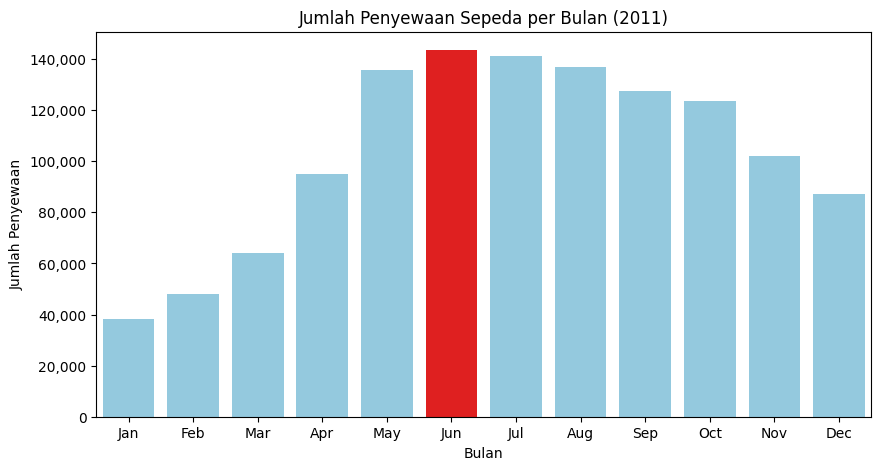

In [46]:
data_2011 = day_df[day_df['yr'] == 0]
monthly_rentals_2011 = data_2011.groupby('mnth').agg({'cnt': 'sum'}).reset_index()

month_labels = [
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
]
monthly_rentals_2011['mnth'] = monthly_rentals_2011['mnth'].apply(lambda x: month_labels[x - 1])

max_value = monthly_rentals_2011['cnt'].max()

colors = ['red' if cnt == max_value else 'skyblue' for cnt in monthly_rentals_2011['cnt']]

plt.figure(figsize=(10, 5))
sns.barplot(
    x='mnth',
    y='cnt',
    data=monthly_rentals_2011,
    palette=colors
)

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.xlabel("Bulan")
plt.ylabel("Jumlah Penyewaan")
plt.title("Jumlah Penyewaan Sepeda per Bulan (2011)")

plt.show()

Insight:
- pada diagram diatas menunjukkan data penyewa perbulan pada tahun 2011. terlihat pada diagram tersebut bahwa penyewa terbanyak di tahun 2011 berada pada bulan juni

<ipython-input-48-a84cd6154611>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


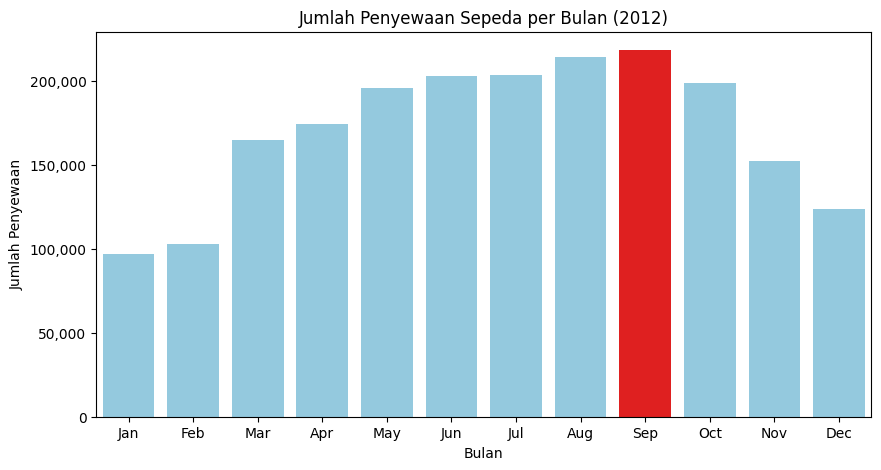

In [48]:
data_2011 = day_df[day_df['yr'] == 1]

monthly_rentals_2011 = data_2011.groupby('mnth').agg({'cnt': 'sum'}).reset_index()

month_labels = [
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
]
monthly_rentals_2011['mnth'] = monthly_rentals_2011['mnth'].apply(lambda x: month_labels[x - 1])

max_value = monthly_rentals_2011['cnt'].max()

colors = ['red' if cnt == max_value else 'skyblue' for cnt in monthly_rentals_2011['cnt']]

plt.figure(figsize=(10, 5))
sns.barplot(
    x='mnth',
    y='cnt',
    data=monthly_rentals_2011,
    palette=colors
)

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.xlabel("Bulan")
plt.ylabel("Jumlah Penyewaan")
plt.title("Jumlah Penyewaan Sepeda per Bulan (2012)")

plt.show()

Insight:
- pada diagram diatas menunjukkan data penyewa perbulan pada tahun 2012. terlihat pada diagram tersebut bahwa penyewa terbanyak di tahun 2012 berada pada bulan september

<ipython-input-61-1bfe082856af>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


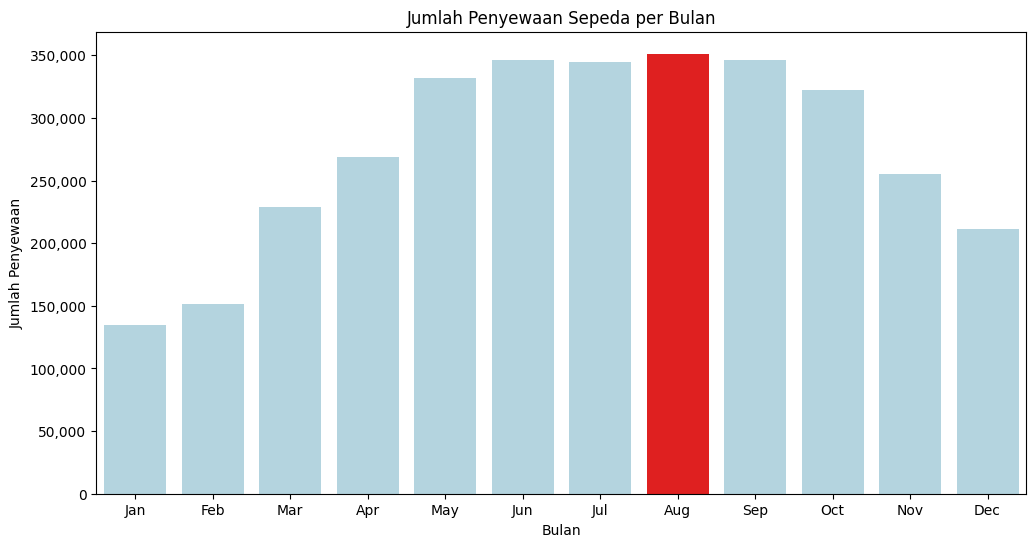

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengelompokkan data berdasarkan bulan dan menghitung statistik
monthly_rentals = day_df.groupby('mnth').agg({'cnt': 'sum'}).reset_index()

# Mapping nama bulan
month_labels = [
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
]
monthly_rentals['mnth'] = monthly_rentals['mnth'].apply(lambda x: month_labels[x - 1])

# Menentukan warna, bulan dengan penyewaan tertinggi diberi warna berbeda
max_value = monthly_rentals['cnt'].max()
colors = ['lightblue' if cnt < max_value else 'red' for cnt in monthly_rentals['cnt']]

# Membuat diagram batang
plt.figure(figsize=(12, 6))
sns.barplot(
    x='mnth',
    y='cnt',
    data=monthly_rentals,
    palette=colors
)

# Menyesuaikan format angka pada sumbu Y
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Menyesuaikan label dan tampilan
plt.xlabel("Bulan")
plt.ylabel("Jumlah Penyewaan")
plt.title("Jumlah Penyewaan Sepeda per Bulan")

# Menampilkan plot
plt.show()


pada diagram diatas adalah perbandingan penyewaan per bulan pada 2 tahun ini

### Pertanyaan 2: Perbandingkan jumlah casual dan registered pada setiap tahun

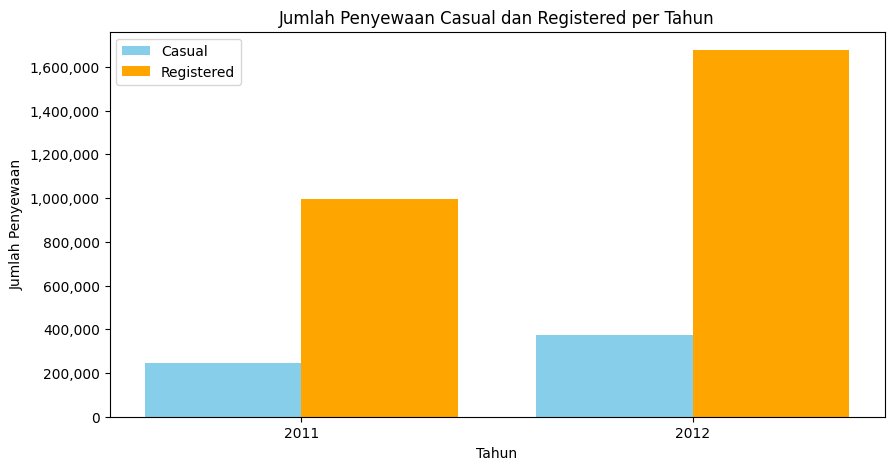

In [49]:
penyewa_pertahun = day_df.groupby('yr').agg({
    'casual': ['sum','max','min'],
    'registered': ['sum','max','min']
}).reset_index()

year_labels = {0: "2011", 1: "2012"}
penyewa_pertahun['yr'] = penyewa_pertahun['yr'].map(year_labels)

x = np.arange(len(penyewa_pertahun['yr']))  # Posisi batang
width = 0.4  # Lebar batang

plt.figure(figsize=(10, 5))

plt.bar(x - width/2, penyewa_pertahun[('casual', 'sum')], width, label='Casual', color='skyblue')

plt.bar(x + width/2, penyewa_pertahun[('registered', 'sum')], width, label='Registered', color='orange')

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.xticks(ticks=x, labels=penyewa_pertahun['yr'])
plt.xlabel("Tahun")
plt.ylabel("Jumlah Penyewaan")
plt.title("Jumlah Penyewaan Casual dan Registered per Tahun")
plt.legend()

# Menampilkan plot
plt.show()


Insight:
- Pada diagram diatas terlihat perbedaan jumlah penyewa casual dan registered yang dimana terlihat bahwa dari tahun 2011 sampai 2012 masih banyak pada penyewa registered bahkan memiliki perbandingan yang cukup jauh

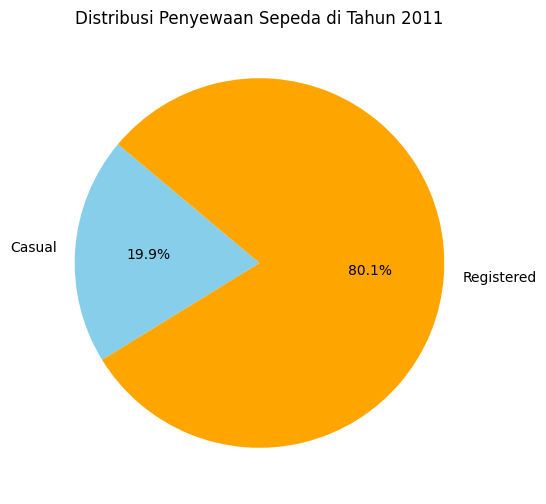

In [57]:
import matplotlib.pyplot as plt

data_2011 = penyewa_pertahun[penyewa_pertahun['yr'] == "2011"]

labels = ['Casual', 'Registered']
sizes = [data_2011[('casual', 'sum')].values[0], data_2011[('registered', 'sum')].values[0]]
colors = ['skyblue', 'orange']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Distribusi Penyewaan Sepeda di Tahun 2011")

plt.show()


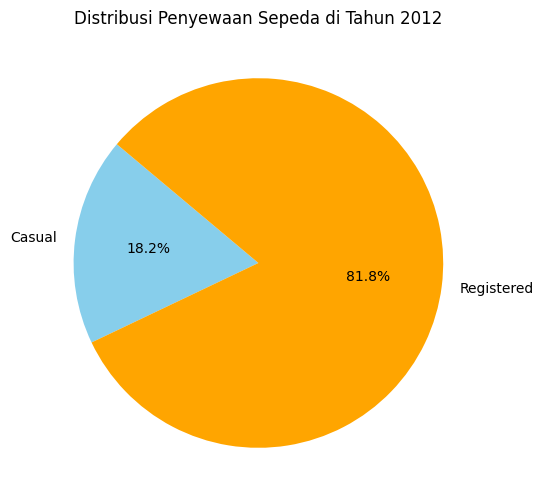

In [59]:
data_2012 = penyewa_pertahun[penyewa_pertahun['yr'] == "2012"]

labels = ['Casual', 'Registered']
sizes = [data_2012[('casual', 'sum')].values[0], data_2012[('registered', 'sum')].values[0]]
colors = ['skyblue', 'orange']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Distribusi Penyewaan Sepeda di Tahun 2012")

# Menampilkan plot
plt.show()


**Insight:**
- 2 diagram diatas adalah perbandingan antara casual dan registered pada tahun 2011 dan 2012 yang dapat dilihat bahwasanya memiliki perbandingan yang sangat tinggi dari tahun 2011 maupun 2012

## Conclusion

- Pada penyewaan sepeda dengan data 2 tahun yaitu tahun 2011 sampai 2012 memiliki jumlah penyewa terbanyak pada bulan juni di tahun 2011 dan bulan september pada tahun 2012 tetapi apabila pada kedua tahun itu digabungkan penyewaan tertinggi pada bulan agustus yaitu mencapai 351194 penyewa
- pada pertanyaan kedua saya membandingkan banyaknya penyewa casual dan registerd dapat diambil kesimpulan dari diagram diatas bahwasanya sangat cukup banyak penyewa registered tetepi masih terdapat 18% sampai 20% penyewa casual